<a href="https://colab.research.google.com/github/Deekshith425374/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                          Fake News Detection

Project Flow:
   1: Bussiness Problem
   2: Data Gathering
   3: Data Analysis or understanding of a data
   4: Data Preprocessing:
      A: Text Cleaning
      B: Tokenization
      C: Removal Of Stopwords
      D: Lemmatization
      
  5: Vectorization (Convert Text Data into Vector):
     * TF-IDF
  6: Model Building:
     A: Train Test Split
     B: Model object Initialization
     C: Model Prediction
  7: Model Evaluation:
     A: Accuracy_Score
     B: Confusion Matrix
  8: Model Deployment
  9: Prediction on client data.
     

## Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import ngrams

 ## Data Gathering

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Fake - Fake.csv to Fake - Fake.csv


In [ ]:
from google.colab import files
uploaded= files.upload()

In [ ]:
fake_df = pd.read_csv('Fake.csv', encoding='latin-1')
fake_df.head()

FileNotFoundError: ignored

In [ ]:
try:
    true_df = pd.read_csv('True.csv', encoding='latin-1', error_bad_lines=False)
    true_df.head()
except pd.errors.ParserError as e:
    print("ParserError:", e)

<ipython-input-8-bf662379ffe0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  true_df = pd.read_csv('True.csv', encoding='latin-1', error_bad_lines=False)
Skipping line 11067: expected 4 fields, saw 8



In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Data Analysis

In [ ]:
true_df["text"][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a \x1cfiscal conservative\x1d on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS\x19 \x1cFace the Nation,\x1d drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense \x1cdiscretionary\x1d spending on program

In [ ]:
fake_df.shape , true_df.shape

((23481, 4), (21416, 4))

In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_df[fake_df.duplicated()]

,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA&OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [ ]:
fake_df= fake_df.drop_duplicates()

In [ ]:
fake_df.shape

(23478, 4)

In [ ]:
true_df[true_df.duplicated()]

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21227,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017"
21262,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017"
21289,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21352,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"


In [ ]:
true_df = true_df.drop_duplicates()

In [ ]:
true_df.shape

(21210, 4)

In [ ]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_true = true_df.copy()
df_fake = fake_df.copy()

In [ ]:
df_true["class"]=1
df_fake["class"]=0

In [ ]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df_fake["subject"].value_counts()

News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
df_true["subject"].value_counts()

politicsNews    11219
worldnews        9991
Name: subject, dtype: int64

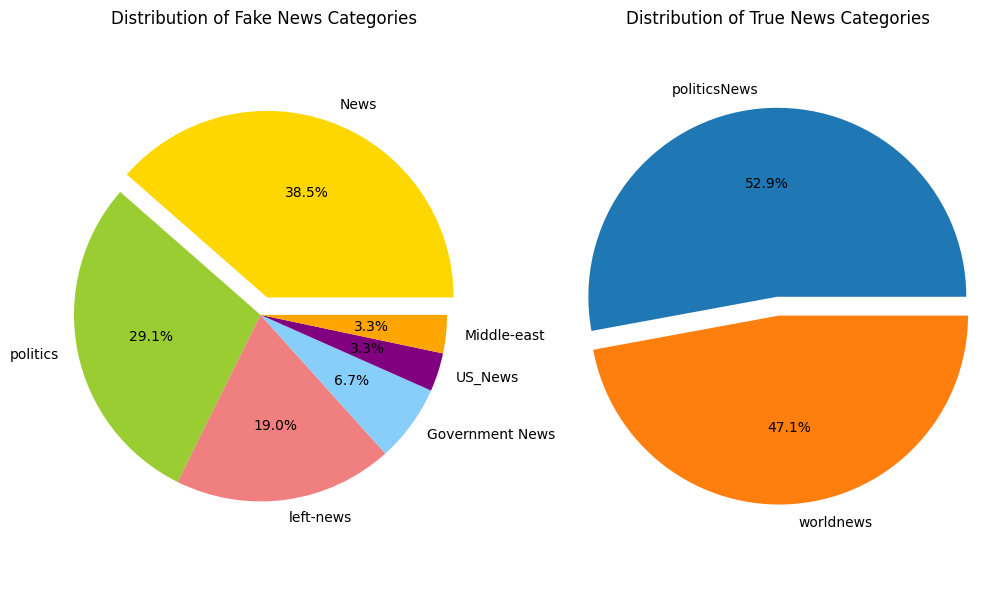

In [ ]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'orange']
explode1 = (0.1, 0, 0, 0, 0, 0)
explode2 = (0.1, 0)


# Create a subplot with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first pie chart in the first subplot
fake_labels = df_fake["subject"].value_counts().index
fake_sizes = df_fake["subject"].value_counts().values
ax1.pie(fake_sizes, explode=explode1, labels=fake_labels, colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Distribution of Fake News Categories')

# Plot the second pie chart in the second subplot
true_labels = df_true["subject"].value_counts().index
true_sizes = df_true["subject"].value_counts().values
ax2.pie(true_sizes, labels=true_labels, autopct='%1.1f%%', explode=explode2)
ax2.axis('equal')
ax2.set_title('Distribution of True News Categories')

plt.tight_layout()
plt.show()


In [ ]:
df_fake["date"][0]

'December 31, 2017'

In [ ]:
# Convert the 'date' column to datetime format
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce')
df_true['date'] = pd.to_datetime(df_true['date'], errors='coerce')

In [ ]:
df_fake['date'][0]

Timestamp('2017-12-31 00:00:00')

In [ ]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0


In [ ]:
# Extract year, month & day from the 'date' column
df_fake['year'] = df_fake['date'].dt.year
df_fake['month'] = df_fake['date'].dt.month_name()
df_fake['day'] = df_fake['date'].dt.day_name()
df_true['year'] = df_true['date'].dt.year
df_true['month'] = df_true['date'].dt.month_name()
df_true['day'] = df_true['date'].dt.day_name()

In [ ]:
df_fake.head()

,title,text,subject,date,class,year,month,day
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,2017.0,December,Sunday
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,2017.0,December,Sunday
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,2017.0,December,Saturday
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,2017.0,December,Friday
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,2017.0,December,Monday


Text(0.5, 1.0, 'Yearwise Fake News Data')

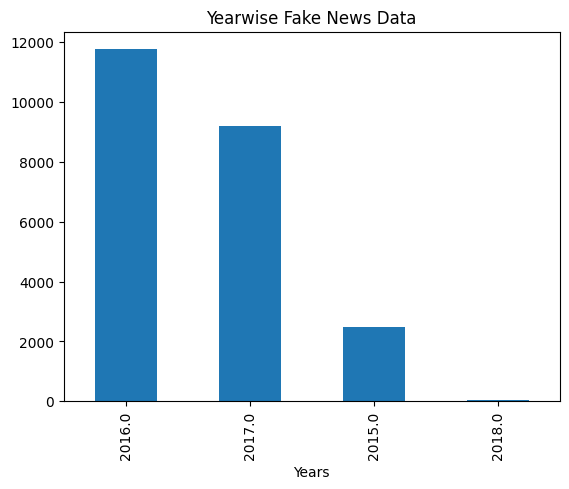

In [ ]:
df_fake['year'].value_counts().plot(kind="bar")
plt.xlabel("Years")
plt.title("Yearwise Fake News Data")

In [ ]:
df_true['year'].value_counts()

2017    16510
2016     4700
Name: year, dtype: int64

Text(0.5, 1.0, 'Yearwise True News Data')

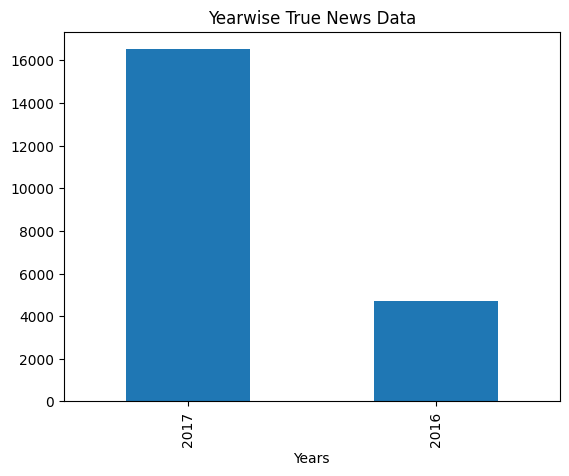

In [ ]:
df_true['year'].value_counts().plot(kind="bar")
plt.xlabel("Years")
plt.title("Yearwise True News Data")

Text(0.5, 1.0, 'Monthwise Fake News Data')

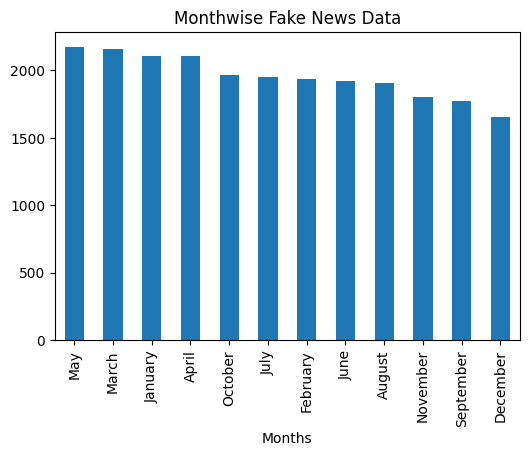

In [ ]:
plt.figure(figsize=(6, 4))
df_fake['month'].value_counts().plot(kind="bar")
plt.xlabel("Months")
plt.title("Monthwise Fake News Data")

Text(0.5, 1.0, 'Monthwise True News Data')

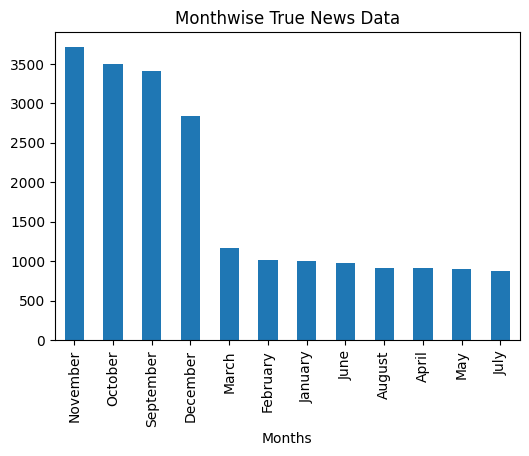

In [ ]:
plt.figure(figsize=(6, 4))
df_true['month'].value_counts().plot(kind="bar")
plt.xlabel("Months")
plt.title("Monthwise True News Data")

Text(0.5, 1.0, 'Daywise Fake News Data')

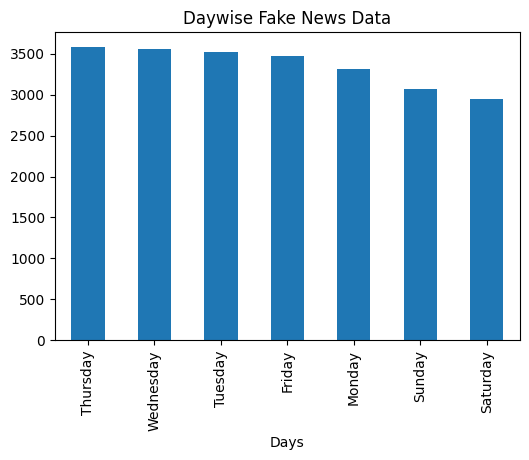

In [ ]:
plt.figure(figsize=(6, 4))
df_fake['day'].value_counts().plot(kind="bar")
plt.xlabel("Days")
plt.title("Daywise Fake News Data")

Text(0.5, 1.0, 'Daywise True News Data')

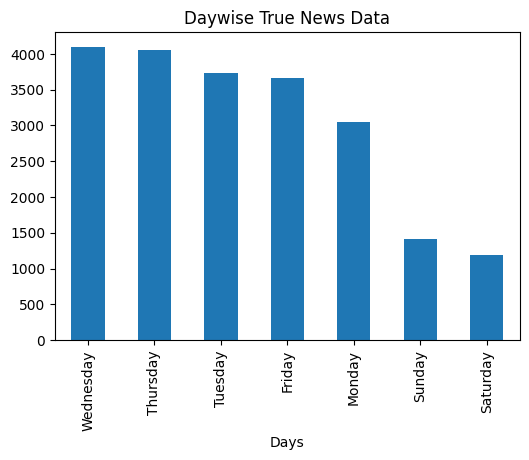

In [ ]:
plt.figure(figsize=(6, 4))
df_true['day'].value_counts().plot(kind="bar")
plt.xlabel("Days")
plt.title("Daywise True News Data")

In [ ]:
pd.crosstab(df_fake['subject'],df_fake['year'])

year,2015.0,2016.0,2017.0,2018.0
subject,,,,
Government News,581,597,390,0
Middle-east,0,400,378,0
News,0,5841,3209,0
US_News,0,405,378,0
left-news,740,1805,1911,0
politics,1157,2706,2935,35


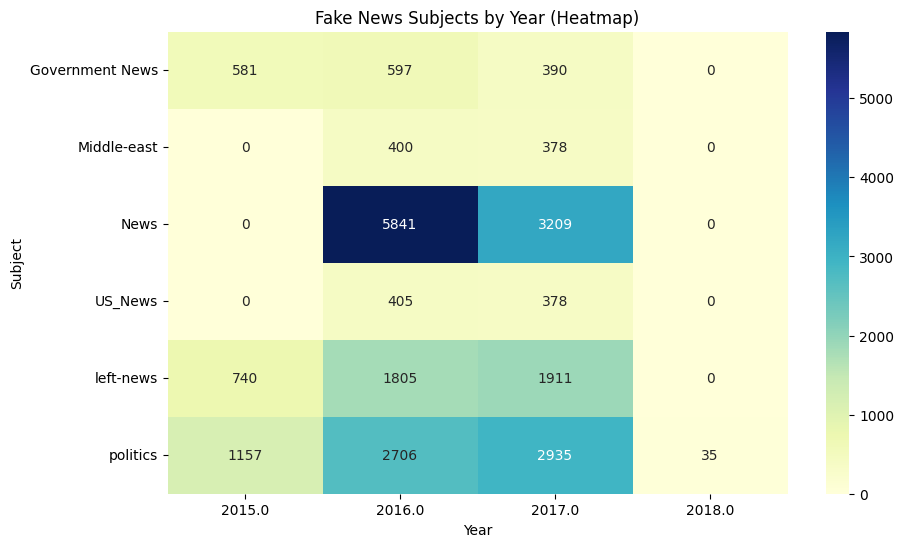

In [ ]:
fake_crosstab = pd.crosstab(df_fake['subject'], df_fake['year'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(fake_crosstab, annot=True, cmap="YlGnBu",fmt = 'd')
plt.title('Fake News Subjects by Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Subject')
plt.show()


In [ ]:
pd.crosstab(df_true['subject'],df_true['year'])

year,2016,2017
subject,,
politicsNews,4700,6519
worldnews,0,9991


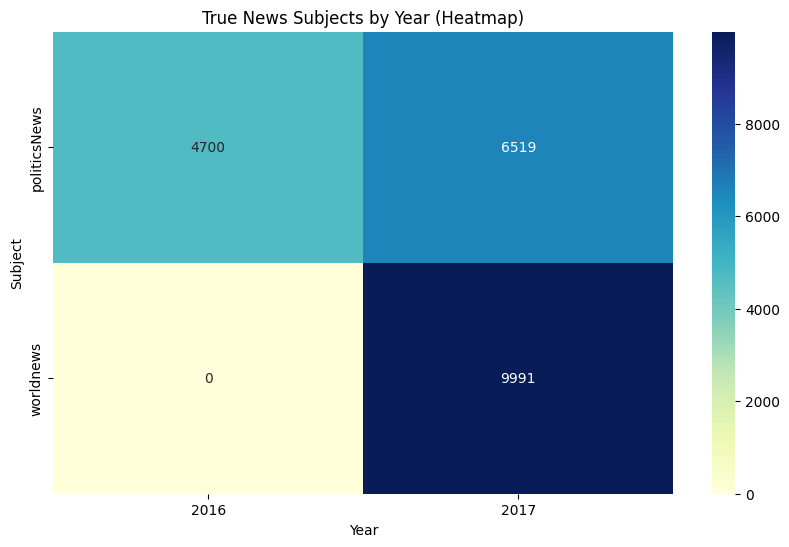

In [ ]:
true_crosstab = pd.crosstab(df_true['subject'], df_true['year'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(true_crosstab, annot=True, cmap="YlGnBu",fmt='d')
plt.title('True News Subjects by Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Subject')
plt.show()


In [ ]:
df_fake = df_fake.drop(["year","month","day"], axis = 1)
df_true= df_true.drop(["year","month","day"], axis = 1)

## Data Preprocessing

### A: Text Cleaning

In [ ]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+/www\.\S+','',text)
    text = re.sub("<.*?>+"," ",text)
    text = re.sub("[%s]" % re.escape(string.punctuation)," ",text)
    text = re.sub("\n"," ",text)
    text = re.sub("\w*\d\w*"," ",text)
    return text


In [ ]:
df_fake["text"] = df_fake["text"].apply(word_drop)
df_fake["title"] = df_fake["title"].apply(word_drop)

In [ ]:
df_fake.head()

,title,text,subject,date,class
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0


In [ ]:
df_true["text"] = df_true["text"].apply(word_drop)
df_true["title"] = df_true["title"].apply(word_drop)

In [ ]:
df_true.head()

,title,text,subject,date,class
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1


### B: Tokenization

In [ ]:
# A function to tokenize the text
def tokenize_text(text):
    return word_tokenize(text)

# we can access the tokens for a specific row using df_true.at[index, "tokens"].

In [ ]:
# Tokenize the preprocessed text and store it in a new column "tokens"
nltk.download('punkt')
df_fake["text_tokens"] = df_fake["text"].apply(tokenize_text)
df_fake["title_tokens"] = df_fake["title"].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, sends, out, embarrassing, new,..."
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,"[on, friday, it, was, revealed, that, former, ...","[sheriff, david, clarke, becomes, an, internet..."
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,"[on, christmas, day, donald, trump, announced,...","[trump, is, so, obsessed, he, even, has, obama..."
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, just, called, out, donald, tru..."


In [ ]:
df_true["text_tokens"] = df_true["text"].apply(tokenize_text)
df_true["title_tokens"] = df_true["title"].apply(tokenize_text)

In [ ]:
df_true.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1,"[washington, reuters, the, head, of, a, conser...","[as, u, s, budget, fight, looms, republicans, ..."
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1,"[washington, reuters, transgender, people, wil...","[u, s, military, to, accept, transgender, recr..."
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1,"[washington, reuters, the, special, counsel, i...","[senior, u, s, republican, senator, let, mr, m..."
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, by, australian, d..."
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1,"[seattle, washington, reuters, president, dona...","[trump, wants, postal, service, to, charge, mu..."


### C: Removal Of Stopwords

In [ ]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    meaningful_tokens = [token for token in tokens if token.lower() not in stop_words]
    return meaningful_tokens

In [ ]:
nltk.download('stopwords')
df_fake["text_tokens"] = df_fake["text_tokens"].apply(remove_stopwords)
df_fake["title_tokens"] = df_fake["title_tokens"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,"[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year..."
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,"[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo..."
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,"[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obama, name, coded, we..."
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, used, annual, christmas, day, ...","[pope, francis, called, donald, trump, christm..."


In [ ]:
df_true["text_tokens"] = df_true["text_tokens"].apply(remove_stopwords)
df_true["title_tokens"] = df_true["title_tokens"].apply(remove_stopwords)

In [ ]:
df_true.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1,"[washington, reuters, head, conservative, repu...","[u, budget, fight, looms, republicans, flip, f..."
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1,"[washington, reuters, transgender, people, all...","[u, military, accept, transgender, recruits, m..."
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1,"[washington, reuters, special, counsel, invest...","[senior, u, republican, senator, let, mr, muel..."
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, australian, diplo..."
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1,"[seattle, washington, reuters, president, dona...","[trump, wants, postal, service, charge, much, ..."


In [ ]:
df_true['title_tokens'][0]

['u', 'budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script']

### D: Lemmatization

In [ ]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [ ]:
# Applying lemmatization to the 'text' & 'title' tokens column
nltk.download('wordnet')
df_fake['text_tokens'] = df_fake['text_tokens'].apply(lemmatize_tokens)
df_fake['title_tokens'] = df_fake['title_tokens'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,"[donald, trump, wish, american, happy, new, ye...","[donald, trump, sends, embarrassing, new, year..."
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,"[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo..."
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,"[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obama, name, coded, we..."
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, used, annual, christmas, day, ...","[pope, francis, called, donald, trump, christm..."


In [ ]:
df_true['text_tokens'] = df_true['text_tokens'].apply(lemmatize_tokens)
df_true['title_tokens'] = df_true['title_tokens'].apply(lemmatize_tokens)

In [ ]:
df_true.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1,"[washington, reuters, head, conservative, repu...","[u, budget, fight, loom, republican, flip, fis..."
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1,"[washington, reuters, transgender, people, all...","[u, military, accept, transgender, recruit, mo..."
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1,"[washington, reuters, special, counsel, invest...","[senior, u, republican, senator, let, mr, muel..."
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, australian, diplo..."
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1,"[seattle, washington, reuters, president, dona...","[trump, want, postal, service, charge, much, a..."


### Representation of Wordcloud

In [ ]:
# Combine all the lemmatized tokens into a single list
all_fake_lemmatized_text = [token for tokens_list in df_fake["text_tokens"] for token in tokens_list]
all_fake_lemmatized_title = [token for tokens_list in df_fake["title_tokens"] for token in tokens_list]


In [ ]:
# Count the frequency of each lemmatized word
fake_text_freq = Counter(all_fake_lemmatized_text)
fake_title_freq = Counter(all_fake_lemmatized_title)

In [ ]:
fake_text_freq

Counter({'donald': 17662,
         'trump': 79369,
         'wish': 778,
         'american': 18106,
         'happy': 998,
         'new': 14366,
         'year': 19047,
         'leave': 1649,
         'instead': 3188,
         'give': 3898,
         'shout': 156,
         'enemy': 1019,
         'hater': 226,
         'dishonest': 287,
         'fake': 3006,
         'news': 14610,
         'medium': 11792,
         'former': 7289,
         'reality': 2008,
         'show': 8327,
         'star': 1794,
         'one': 25382,
         'job': 5297,
         'country': 11443,
         'rapidly': 175,
         'grows': 61,
         'stronger': 255,
         'smarter': 71,
         'want': 9885,
         'friend': 3266,
         'supporter': 5030,
         'even': 14009,
         'healthy': 247,
         'president': 28269,
         'angry': 1040,
         'pant': 225,
         'tweeted': 1632,
         'great': 4304,
         'america': 11244,
         'j': 3861,
         'realdonaldtru

In [ ]:
fake_title_freq

Counter({'donald': 848,
         'trump': 9349,
         'sends': 60,
         'embarrassing': 80,
         'new': 905,
         'year': 464,
         'eve': 13,
         'message': 193,
         'disturbing': 61,
         'drunk': 28,
         'bragging': 23,
         'staffer': 64,
         'started': 31,
         'russian': 348,
         'collusion': 53,
         'investigation': 175,
         'sheriff': 96,
         'david': 52,
         'clarke': 26,
         'becomes': 28,
         'internet': 125,
         'joke': 72,
         'threatening': 52,
         'poke': 4,
         'people': 515,
         'eye': 48,
         'obsessed': 33,
         'even': 191,
         'obama': 2581,
         'name': 114,
         'coded': 1,
         'website': 54,
         'image': 386,
         'pope': 52,
         'francis': 17,
         'called': 153,
         'christmas': 79,
         'speech': 443,
         'racist': 524,
         'alabama': 51,
         'cop': 479,
         'brutalize': 2,
   

In [ ]:
# Print the most common lemmatized words and their frequencies
print(fake_text_freq.most_common(10))

[('trump', 79369), ('said', 33760), ('president', 28269), ('people', 26621), ('one', 25382), ('u', 24484), ('state', 23625), ('would', 23550), ('clinton', 19778), ('time', 19199)]


In [ ]:
print(fake_title_freq.most_common(10))

[('trump', 9349), ('video', 3409), ('obama', 2581), ('hillary', 2310), ('watch', 1932), ('clinton', 1175), ('president', 1165), ('u', 1148), ('get', 980), ('black', 973)]


In [ ]:
all_true_lemmatized_text = [token for tokens_list in df_true["text_tokens"] for token in tokens_list]
all_true_lemmatized_title = [token for tokens_list in df_true["title_tokens"] for token in tokens_list]


In [ ]:
# Count the frequency of each lemmatized word
true_text_freq = Counter(all_true_lemmatized_text)
true_title_freq = Counter(all_true_lemmatized_title)

In [ ]:
# Print the most common lemmatized words and their frequencies
print(true_text_freq.most_common(10))

[('said', 97866), ('trump', 54115), ('u', 46534), ('state', 37225), ('would', 31240), ('reuters', 28674), ('president', 28418), ('republican', 22862), ('year', 22354), ('government', 19681)]


In [ ]:
print(true_title_freq.most_common(10))

[('trump', 5523), ('u', 4688), ('say', 3200), ('house', 1449), ('republican', 972), ('russia', 967), ('north', 912), ('korea', 887), ('new', 871), ('state', 819)]


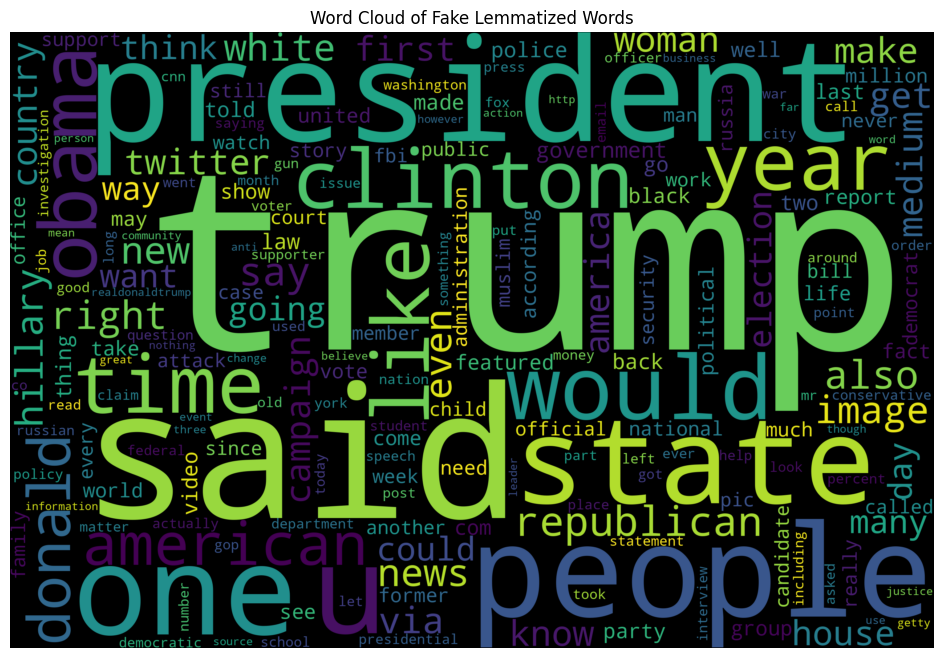

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, background_color='black').generate_from_frequencies(fake_text_freq)

# Display the generated word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fake Lemmatized Words')
plt.show()
#wordcloud.to_file("fake.png")

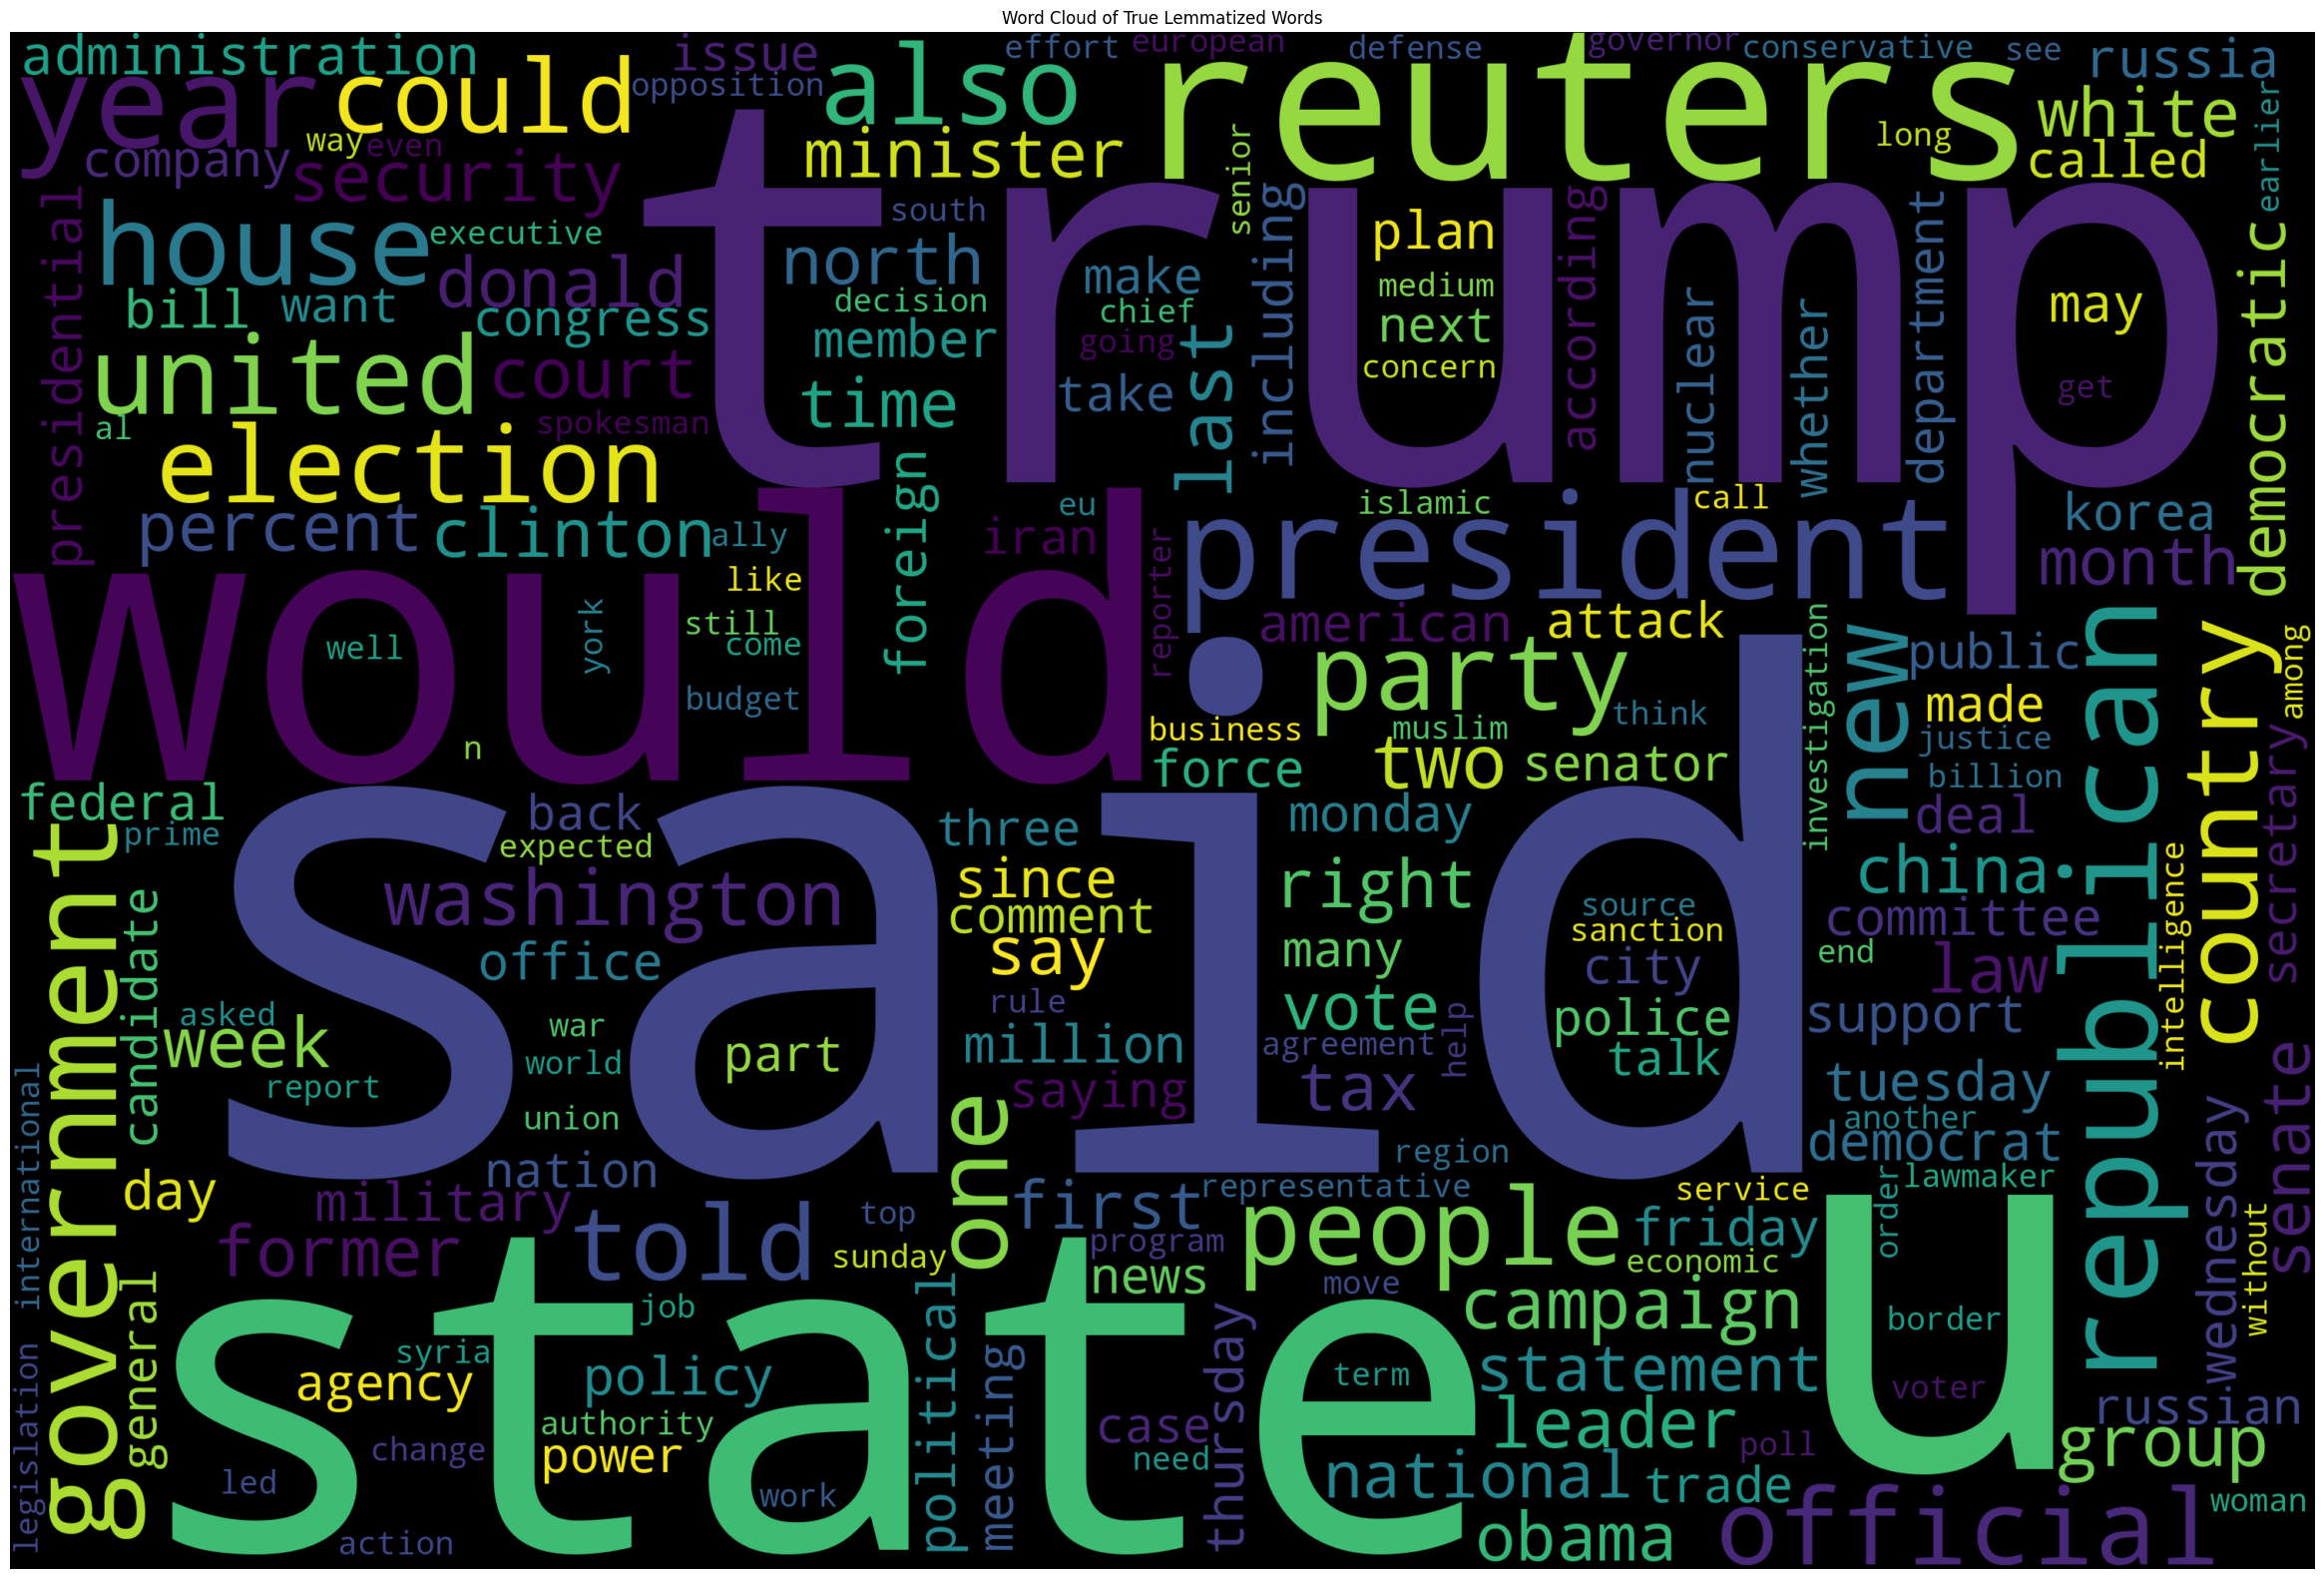

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, background_color='black').generate_from_frequencies(true_text_freq)

# Display the generated word cloud
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of True Lemmatized Words')
plt.show()
#wordcloud.to_file("true.png")

### Unigrams

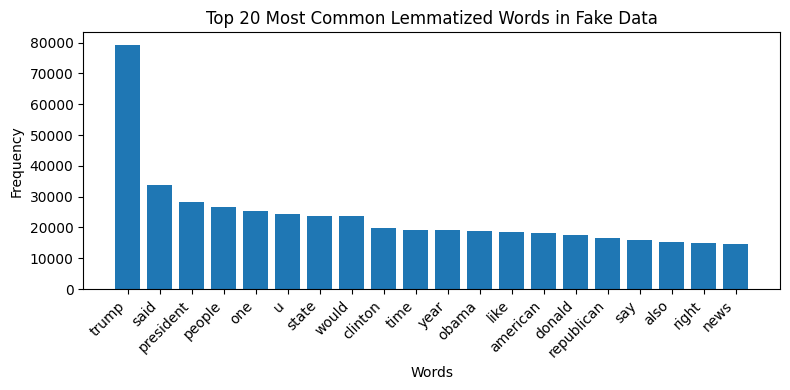

In [ ]:
# Get the most common 20 words and their frequencies
most_fake_common_words = fake_text_freq.most_common(20)
most_fake_common_words, frequencies = zip(*most_fake_common_words)

# Plot the most common words and their frequencies
plt.figure(figsize=(8, 4))
plt.bar(most_fake_common_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Lemmatized Words in Fake Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


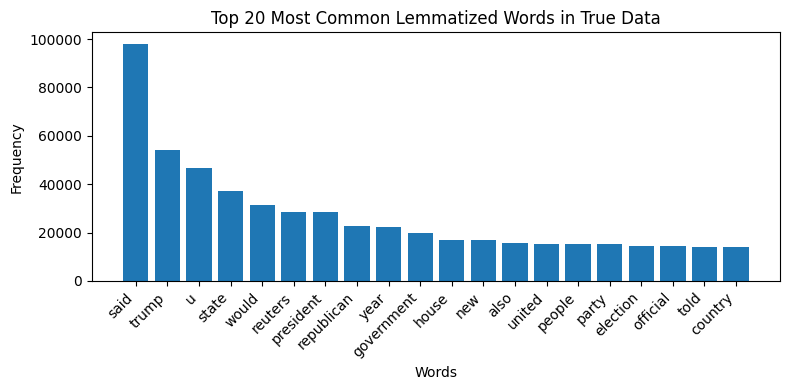

In [ ]:
# Get the most common 20 words and their frequencies
most_true_common_words = true_text_freq.most_common(20)
most_true_common_words, frequencies = zip(*most_true_common_words)

# Plot the most common words and their frequencies
plt.figure(figsize=(8, 4))
plt.bar(most_true_common_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Lemmatized Words in True Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Bigrams

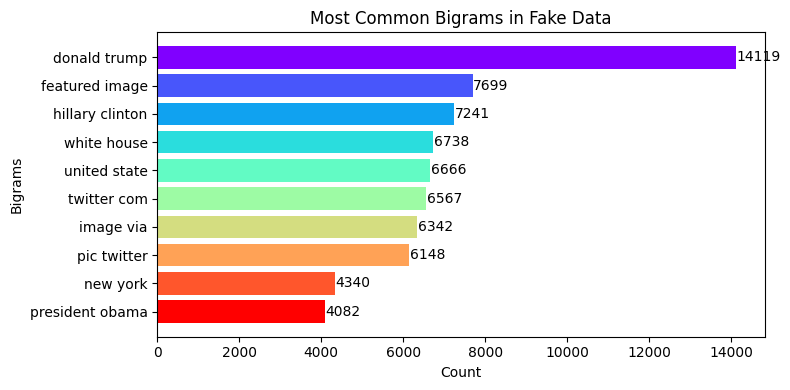

In [ ]:
bigram_lists = [list(ngrams(tokens, 2)) for tokens in df_fake['text_tokens']]
# Flatten the list of bigrams
all_bigrams = [bigram for bigrams_list in bigram_lists for bigram in bigrams_list]
# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)
# Extract labels and counts from most_common_bigrams
bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigrams]
bigram_counts = [count for _, count in most_common_bigrams]


# Create a gradient of rainbow colors
num_colors = len(bigram_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Create a horizontal bar plot for most common bigrams with rainbow colors
plt.figure(figsize=(8, 4))
bars = plt.barh(bigram_labels, bigram_counts, color=colors)

# Adding labels and counts on the bars
for bar, count in zip(bars, bigram_counts):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, str(count), va='center')

plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.title('Most Common Bigrams in Fake Data')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()
plt.show()


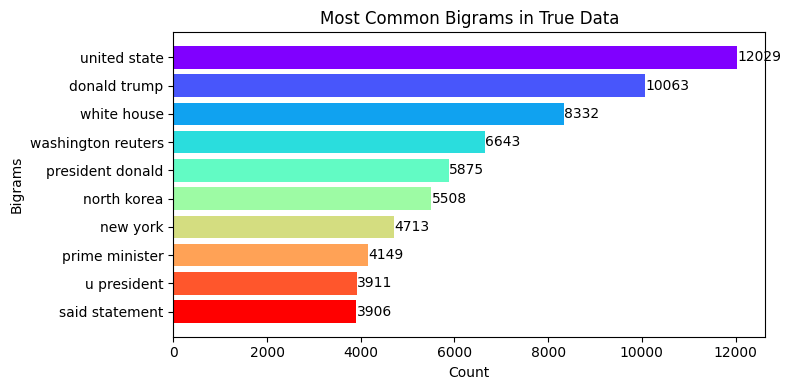

In [ ]:
bigram_lists = [list(ngrams(tokens, 2)) for tokens in df_true['text_tokens']]
# Flatten the list of bigrams
all_bigrams = [bigram for bigrams_list in bigram_lists for bigram in bigrams_list]
# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)
# Extract labels and counts from most_common_bigrams
bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigrams]
bigram_counts = [count for _, count in most_common_bigrams]


# Create a gradient of rainbow colors
num_colors = len(bigram_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Create a horizontal bar plot for most common bigrams with rainbow colors
plt.figure(figsize=(8,4))
bars = plt.barh(bigram_labels, bigram_counts, color=colors)

# Adding labels and counts on the bars
for bar, count in zip(bars, bigram_counts):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, str(count), va='center')

plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.title('Most Common Bigrams in True Data')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()
plt.show()


### Trigrams

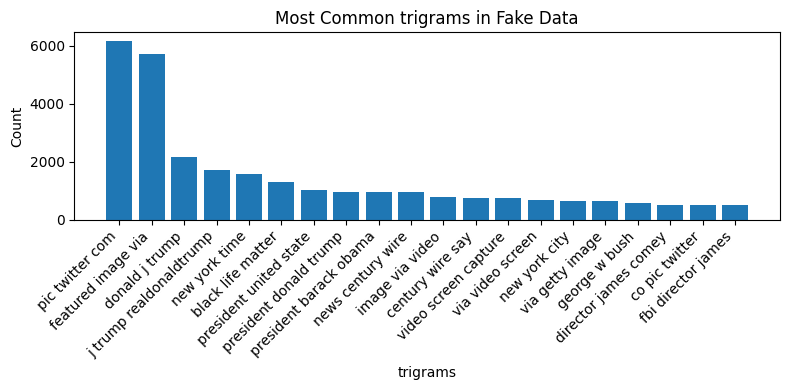

In [ ]:
trigram_lists = [list(ngrams(tokens, 3)) for tokens in df_fake['text_tokens']]
all_trigrams = [trigram for trigrams_list in trigram_lists for trigram in trigrams_list]
# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

most_common_trigrams = trigram_counts.most_common(20)
trigram_labels = [' '.join(trigram) for trigram, _ in most_common_trigrams]
trigram_counts = [count for _, count in most_common_trigrams]

# Create a vertical bar plot for most common trigrams
plt.figure(figsize=(8, 4))
plt.bar(trigram_labels, trigram_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('trigrams')
plt.ylabel('Count')
plt.title('Most Common trigrams in Fake Data')
plt.tight_layout()
plt.show()


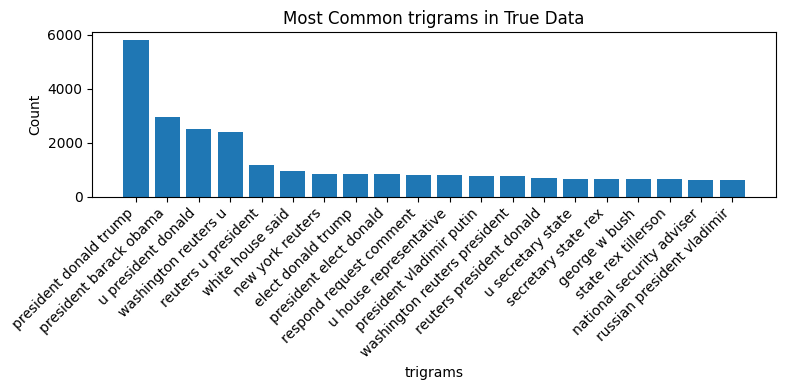

In [ ]:
trigram_lists = [list(ngrams(tokens, 3)) for tokens in df_true['text_tokens']]
all_trigrams = [trigram for trigrams_list in trigram_lists for trigram in trigrams_list]
# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

most_common_trigrams = trigram_counts.most_common(20)
trigram_labels = [' '.join(trigram) for trigram, _ in most_common_trigrams]
trigram_counts = [count for _, count in most_common_trigrams]

# Create a vertical bar plot for most common trigrams
plt.figure(figsize=(8, 4))
plt.bar(trigram_labels, trigram_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('trigrams')
plt.ylabel('Count')
plt.title('Most Common trigrams in True Data')
plt.tight_layout()
plt.show()


In [ ]:
# Remove extra spaces and convert tokens back to a string
df_fake["text_tokens"] = df_fake["text_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))
df_fake["title_tokens"] = df_fake["title_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))
df_true["text_tokens"] = df_true["text_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))
df_true["title_tokens"] = df_true["title_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))

In [ ]:
df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,donald trump wish american happy new year leav...,donald trump sends embarrassing new year eve m...
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,christmas day donald trump announced would bac...,trump obsessed even obama name coded website i...
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,pope francis used annual christmas day message...,pope francis called donald trump christmas speech


In [ ]:
df_fake.shape,df_true.shape

((23478, 7), (21210, 7))

In [ ]:
df = pd.concat([df_fake,df_true], ignore_index = True)

In [ ]:
df.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,donald trump wish american happy new year leav...,donald trump sends embarrassing new year eve m...
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,christmas day donald trump announced would bac...,trump obsessed even obama name coded website i...
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,pope francis used annual christmas day message...,pope francis called donald trump christmas speech


In [ ]:
df['class'].value_counts()

0    23478
1    21210
Name: class, dtype: int64

In [ ]:
df[df.duplicated()]

,title,text,subject,date,class,text_tokens,title_tokens


In [ ]:
#Shuffling of Data
df = df.sample(frac=1.0, random_state=42)
df.head()

,title,text,subject,date,class,text_tokens,title_tokens
17893,wow leftist librarian rejects shipment of chi...,a school librarian in cambridge massachusetts...,left-news,2017-09-28,0,school librarian cambridge massachusetts rejec...,wow leftist librarian reject shipment child bo...
39481,kenya opposition leader calls for calm in slum...,nairobi reuters kenyan opposition leader r...,worldnews,2017-10-29,1,nairobi reuters kenyan opposition leader raila...,kenya opposition leader call calm slum hit dea...
36272,egypt rejects u s decision to move its embass...,cairo reuters egypt rejected the u s deci...,worldnews,2017-12-06,1,cairo reuters egypt rejected u decision move e...,egypt reject u decision move embassy jerusalem...
21761,audio nation of islam leader farrakhan we w...,after a recent speech given by minister louis ...,left-news,2015-05-08,0,recent speech given minister louis farrakhan t...,audio nation islam leader farrakhan kill go u
7557,trump rally nearly turns into a full blown ra...,tensions ran high outside of a campaign rally ...,News,2016-03-11,0,tension ran high outside campaign rally donald...,trump rally nearly turn full blown race war st...


In [ ]:
df['title_tokens'][0]

'donald trump sends embarrassing new year eve message disturbing'

In [ ]:
# Concatenate the values of the 'text' and 'title' columns and create a new column
df['input_text'] = df['title_tokens'] + ' ' + df['text_tokens']

In [ ]:
df.head()

,title,text,subject,date,class,text_tokens,title_tokens,input_text
17893,wow leftist librarian rejects shipment of chi...,a school librarian in cambridge massachusetts...,left-news,2017-09-28,0,school librarian cambridge massachusetts rejec...,wow leftist librarian reject shipment child bo...,wow leftist librarian reject shipment child bo...
39481,kenya opposition leader calls for calm in slum...,nairobi reuters kenyan opposition leader r...,worldnews,2017-10-29,1,nairobi reuters kenyan opposition leader raila...,kenya opposition leader call calm slum hit dea...,kenya opposition leader call calm slum hit dea...
36272,egypt rejects u s decision to move its embass...,cairo reuters egypt rejected the u s deci...,worldnews,2017-12-06,1,cairo reuters egypt rejected u decision move e...,egypt reject u decision move embassy jerusalem...,egypt reject u decision move embassy jerusalem...
21761,audio nation of islam leader farrakhan we w...,after a recent speech given by minister louis ...,left-news,2015-05-08,0,recent speech given minister louis farrakhan t...,audio nation islam leader farrakhan kill go u,audio nation islam leader farrakhan kill go u ...
7557,trump rally nearly turns into a full blown ra...,tensions ran high outside of a campaign rally ...,News,2016-03-11,0,tension ran high outside campaign rally donald...,trump rally nearly turn full blown race war st...,trump rally nearly turn full blown race war st...


In [ ]:
len(df['title_tokens'][0]) , len(df['text_tokens'][0]), len(df['input_text'][0])

(63, 1734, 1798)

In [ ]:
df = df.drop(['title','text','subject','date'], axis = 1)

In [ ]:
df = df.drop(['text_tokens','title_tokens'], axis = 1)

In [ ]:
df.head()

,class,input_text
17893,0,wow leftist librarian reject shipment child bo...
39481,1,kenya opposition leader call calm slum hit dea...
36272,1,egypt reject u decision move embassy jerusalem...
21761,0,audio nation islam leader farrakhan kill go u ...
7557,0,trump rally nearly turn full blown race war st...


In [ ]:
df['class'].value_counts()

0    23478
1    21210
Name: class, dtype: int64

### Train Test Spliting

In [ ]:
X = df['input_text']
Y = df['class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=40)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((29940,), (14748,), (29940,), (14748,))

## Feature Extraction : Vectorization

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Model Building : 1.Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized,Y_train)

RandomForestClassifier(random_state=42)

## Model Prediction

### For Training Data

In [ ]:
rf_train_predictions = rf_classifier.predict(X_train_vectorized)

In [ ]:
train_pred_df = pd.DataFrame({'Train_Data':X_train,
              'Actual_output':Y_train,
    'Predictions':rf_train_predictions})

In [ ]:
train_pred_df.head()

,Train_Data,Actual_output,Predictions
18955,politico downgrade america declares germany op...,0,0
8897,maine tea party governor went racist rant offe...,0,0
32392,senate set begin debate puerto rico debt relie...,1,1
31370,new blow campaign trump foundation ordered hal...,1,1
17644,wow stepson new roy moore accuser make emotion...,0,0


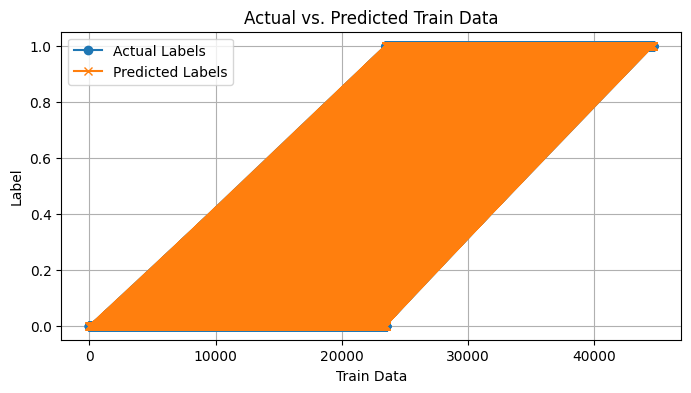

In [ ]:
# Plot actual vs. predicted
plt.figure(figsize=(8, 4))
plt.plot(train_pred_df['Actual_output'], label='Actual Labels', marker='o')
plt.plot(train_pred_df['Predictions'], label='Predicted Labels', marker='x')
plt.xlabel('Train Data')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Train Data')
plt.legend()
plt.grid()
plt.show()


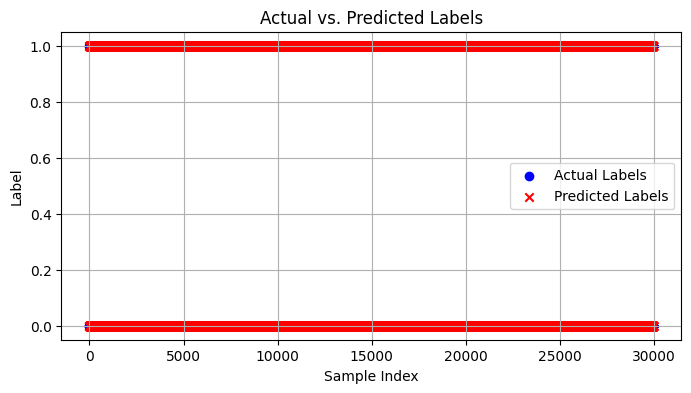

In [ ]:
sample_indices = np.arange(len(train_pred_df['Train_Data']))

# Plot actual vs. predicted labels using a scatter plot
plt.figure(figsize=(8,4))
plt.scatter(sample_indices, train_pred_df['Actual_output'], label='Actual Labels', color='blue', marker='o')
plt.scatter(sample_indices, train_pred_df['Predictions'], label='Predicted Labels', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.grid()
plt.show()


### For Test Data

In [ ]:
rf_test_predictions = rf_classifier.predict(X_test_vectorized)

In [ ]:
test_pred_df = pd.DataFrame({'Test_Data':X_test,
              'Actual_output':Y_test,
    'Predictions':rf_test_predictions})

In [ ]:
test_pred_df.head()

,Test_Data,Actual_output,Predictions
36608,pope end sensitive trip asia seeking rohingya ...,1,1
10691,donald trump jr slam kathy griffin playing vic...,0,0
41298,thousand protest barcelona catalan independenc...,1,1
734,trump torture session every day resigns report...,0,0
30976,nbc wall street journal poll clinton leading t...,1,1


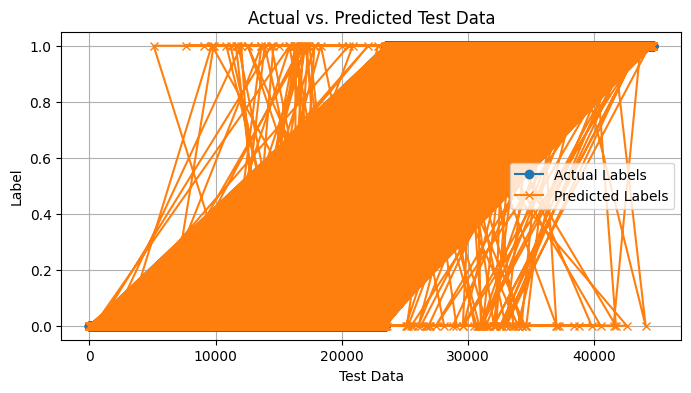

In [ ]:
# Plot actual vs. predicted
plt.figure(figsize=(8, 4))
plt.plot(test_pred_df['Actual_output'], label='Actual Labels', marker='o')
plt.plot(test_pred_df['Predictions'], label='Predicted Labels', marker='x')
plt.xlabel('Test Data')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Test Data')
plt.legend()
plt.grid()
plt.show()

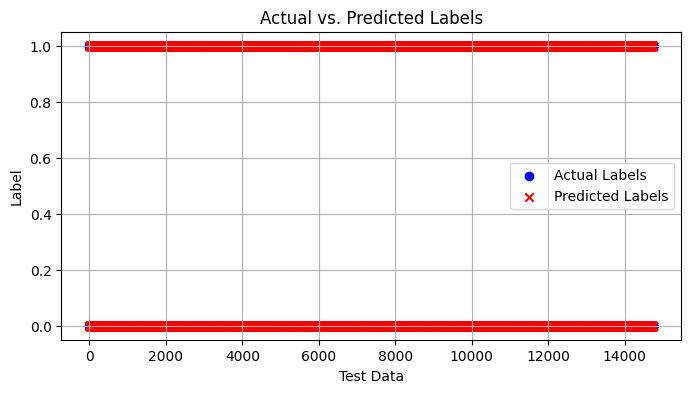

In [ ]:
test_sample_indices = np.arange(len(test_pred_df['Test_Data']))

# Plot actual vs. predicted labels using a scatter plot
plt.figure(figsize=(8,4))
plt.scatter(test_sample_indices, test_pred_df['Actual_output'], label='Actual Labels', color='blue', marker='o')
plt.scatter(test_sample_indices, test_pred_df['Predictions'], label='Predicted Labels', color='red', marker='x')
plt.xlabel('Test Data')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.grid()
plt.show()


## Model Evaluation

### For Train Data

In [ ]:
confusion_matrix(Y_train,rf_train_predictions)

array([[15827,     0],
       [    0, 14113]])

In [ ]:
print("Accuracy Score for the Train Data is :" , accuracy_score(Y_train,rf_train_predictions)*100, "%")

Accuracy Score for the Train Data is : 100.0 %


### For Test Data

In [ ]:
confusion_matrix(Y_test,rf_test_predictions)

array([[7604,   47],
       [  67, 7030]])

In [ ]:
print("Accuracy Score for the Test Data is :" , accuracy_score(Y_test,rf_test_predictions)*100, "%")

Accuracy Score for the Test Data is : 99.22701383238405 %


# 2.Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_vectorized,Y_train)

LogisticRegression()

#** Model Prediction**


## For Training Data

In [ ]:
LR_classifier.intercept_

array([-1.2474406])

In [ ]:
LR_classifier.coef_

array([[ 0.06981693, -0.01699053, -0.00116592, ..., -0.00031468,
         0.00338773, -0.01217947]])

In [ ]:
LR_train_predictions = LR_classifier.predict(X_train_vectorized)

In [ ]:
train_pred_df = pd.DataFrame({'Train_Data':X_train,
              'Actual_output':Y_train,
    'Predictions':LR_train_predictions})

In [ ]:
train_pred_df.head()

,Train_Data,Actual_output,Predictions
18955,politico downgrade america declares germany op...,0,0
8897,maine tea party governor went racist rant offe...,0,0
32392,senate set begin debate puerto rico debt relie...,1,1
31370,new blow campaign trump foundation ordered hal...,1,1
17644,wow stepson new roy moore accuser make emotion...,0,0


## For Test Data

In [ ]:
LR_test_predictions = LR_classifier.predict(X_test_vectorized)

In [ ]:
test_pred_df = pd.DataFrame({'Test_Data':X_test,
              'Actual_output':Y_test,
    'Predictions':LR_test_predictions})

In [ ]:
test_pred_df.head()

,Test_Data,Actual_output,Predictions
36608,pope end sensitive trip asia seeking rohingya ...,1,1
10691,donald trump jr slam kathy griffin playing vic...,0,0
41298,thousand protest barcelona catalan independenc...,1,1
734,trump torture session every day resigns report...,0,0
30976,nbc wall street journal poll clinton leading t...,1,1


# **Model Evaluation**

## For Train Data

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix(Y_train,LR_train_predictions)

array([[15671,   156],
       [  120, 13993]])

In [ ]:
print("Accuracy Score for the Train Data is :" , accuracy_score(Y_train,LR_train_predictions)*100, "%")

Accuracy Score for the Train Data is : 99.07815631262525 %


## **For Test Data**

In [ ]:
confusion_matrix(Y_test,LR_test_predictions)

array([[7524,  127],
       [  84, 7013]])

In [ ]:
print("Accuracy Score for the Test Data is :" , accuracy_score(Y_test,LR_test_predictions)*100, "%")

Accuracy Score for the Test Data is : 98.56929753186873 %


# **ROC_AUC Curve**

Text(0, 0.5, 'True Positive Rate')

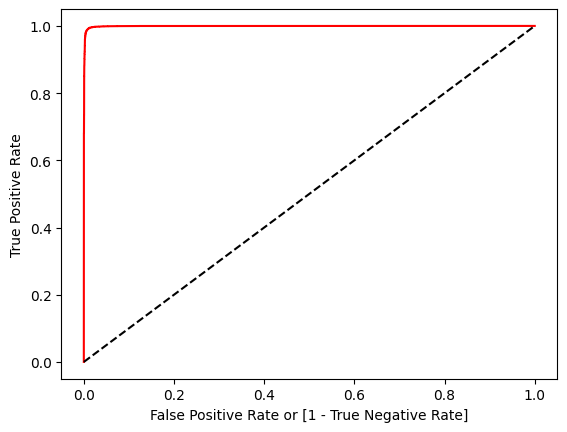

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_train, LR_classifier.predict_proba (X_train_vectorized)[:,1])

auc = roc_auc_score(Y_test, LR_test_predictions)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit mod  el ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc

0.9857824377977797

# **3. Gradient Boosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GB_classifier = GradientBoostingClassifier(learning_rate=0.1)
GB_classifier.fit(X_train_vectorized,Y_train)

GradientBoostingClassifier()

# **Model Prediction**


## For Training Data

In [ ]:
GB_train_predictions = GB_classifier.predict(X_train_vectorized)

In [ ]:
train_pred_df = pd.DataFrame({'Train_Data':X_train,
              'Actual_output':Y_train,
    'Predictions':GB_train_predictions})

In [ ]:
train_pred_df.head()

,Train_Data,Actual_output,Predictions
18955,politico downgrade america declares germany op...,0,0
8897,maine tea party governor went racist rant offe...,0,0
32392,senate set begin debate puerto rico debt relie...,1,1
31370,new blow campaign trump foundation ordered hal...,1,1
17644,wow stepson new roy moore accuser make emotion...,0,0


## **For Test Data**

In [ ]:
GB_test_predictions = GB_classifier.predict(X_test_vectorized)

test_pred_df = pd.DataFrame({'Test_Data':X_test,
              'Actual_output':Y_test,
    'Predictions':GB_test_predictions})

In [ ]:
#Model Evaluation

#For Train Data

confusion_matrix(Y_train,GB_train_predictions)

print("Accuracy Score for the Train Data is :" , accuracy_score(Y_train,GB_train_predictions)*100, "%")


Accuracy Score for the Train Data is : 99.78623914495658 %


In [ ]:
#For Test Data

confusion_matrix(Y_test,GB_test_predictions)

print("Accuracy Score for the Test Data is :" , accuracy_score(Y_test,GB_test_predictions)*100, "%")

Accuracy Score for the Test Data is : 99.55926227285056 %


# **Build stack model**


## Define estimators

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier


estimator_list = [
    ('rf_classifier',rf_classifier),
    ('LR_classifier',LR_classifier),
    ('GB_classifier',GB_classifier),
    ]

In [ ]:
# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# **Train stacked model**

In [ ]:
stack_model.fit(X_train_vectorized, Y_train)

StackingClassifier(estimators=[('rf_classifier',
                                RandomForestClassifier(random_state=42)),
                               ('LR_classifier', LogisticRegression()),
                               ('GB_classifier', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
# Make predictions
y_train_pred = stack_model.predict(X_train_vectorized)
y_test_pred = stack_model.predict(X_test_vectorized)

NameError: ignored

# Training set model performance

In [ ]:
stack_model_train_accuracy = accuracy_score(Y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(Y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance

In [ ]:
stack_model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(Y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score

In [ ]:
print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.999565798263193
- MCC: 0.9991287467242299
- F1 score: 0.9995657990956645
----------------------------------
Model performance for Test set
- Accuracy: 0.9973555736371034
- MCC: 0.9947043122457406
- F1 score: 0.9973556202545449


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramas = {
    'loss': ['log_loss', 'deviance'],
    'n_estimators': [100, 120,140,200,250,300,350],
    'max_depth': [3,4,5]

}

In [ ]:
grid= GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid=paramas)

In [ ]:
grid.fit(X_train_vectorized, Y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
GB_classifier = GradientBoostingClassifier(learning_rate=0.1)
GB_classifier.fit(X_train_vectorized,Y_train)

In [ ]:
GB_train_predictions = GB_classifier.predict(X_train_vectorized)

In [ ]:
GB_test_predictions = GB_classifier.predict(X_test_vectorized)

In [ ]:
#Model Evaluation

#For Train Data

confusion_matrix(Y_train,GB_train_predictions)

print("Accuracy Score for the Train Data is :" , accuracy_score(Y_train,GB_train_predictions)*100, "%")


In [ ]:
#Model Evaluation

#For Train Data

confusion_matrix(Y_test,GB_test_predictions)

print("Accuracy Score for the Train Data is :" , accuracy_score(Y_test,GB_test_predictions)*100, "%")
